In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [6]:
df = pd.read_csv("../Data/processed/energy_clean.csv")

In [7]:
df.head()

,Borough,Account_Name,Serial_Number,Funding_Origin,Total_Bill,KWH_Consumption,KWH_Bill,KW_Consumption,KW_Bill,Year_Month,Start_Date,End_Date
0,bronx,adams,7223256,federal,15396.82,128800.0,2808.0,216.0,2808.0,2010-01-01 01:00:00,2009-12-24,2010-01-26
1,bronx,adams,7223256,federal,14556.34,115200.0,2912.0,224.0,2912.0,2010-02-01 01:00:00,2010-01-26,2010-02-25
2,bronx,adams,7223256,federal,13904.98,103200.0,2808.0,216.0,2808.0,2010-03-01 01:00:00,2010-02-25,2010-03-26
3,bronx,adams,7223256,federal,14764.04,105600.0,2704.0,208.0,2704.0,2010-04-01 01:00:00,2010-03-26,2010-04-26
4,bronx,adams,7223256,federal,13729.54,97600.0,2808.0,216.0,2808.0,2010-05-01 01:00:00,2010-04-26,2010-05-24


In [8]:
df.isna().sum()

Borough            0
Account_Name       0
Serial_Number      0
Funding_Origin     0
Total_Bill         0
KWH_Consumption    0
KWH_Bill           0
KW_Consumption     0
KW_Bill            0
Year_Month         0
Start_Date         0
End_Date           0
dtype: int64

In [11]:
#Generating one-hot-encoding for the borough column using pd.get_dummies

#Temporary one hot encodings with prefix Borough
Temp_OHE = pd.get_dummies(df["Borough"] , prefix = "Borough").astype(int)

#Final dataframe, joining one hot encodings
df_2 = df.join(Temp_OHE)

df_2.drop("Borough" , axis = 1 , inplace = True)

df_2.head()

,Account_Name,Serial_Number,Funding_Origin,Total_Bill,KWH_Consumption,KWH_Bill,KW_Consumption,KW_Bill,Year_Month,Start_Date,End_Date,Borough_bronx,Borough_brooklyn,Borough_fha,Borough_manhattan,Borough_non development facility,Borough_queens,Borough_staten island
0,adams,7223256,federal,15396.82,128800.0,2808.0,216.0,2808.0,2010-01-01 01:00:00,2009-12-24,2010-01-26,1,0,0,0,0,0,0
1,adams,7223256,federal,14556.34,115200.0,2912.0,224.0,2912.0,2010-02-01 01:00:00,2010-01-26,2010-02-25,1,0,0,0,0,0,0
2,adams,7223256,federal,13904.98,103200.0,2808.0,216.0,2808.0,2010-03-01 01:00:00,2010-02-25,2010-03-26,1,0,0,0,0,0,0
3,adams,7223256,federal,14764.04,105600.0,2704.0,208.0,2704.0,2010-04-01 01:00:00,2010-03-26,2010-04-26,1,0,0,0,0,0,0
4,adams,7223256,federal,13729.54,97600.0,2808.0,216.0,2808.0,2010-05-01 01:00:00,2010-04-26,2010-05-24,1,0,0,0,0,0,0


In [12]:
#Generating one-hot-encoding for the funding origion column using pd.get_dummies

#Temporary one hot encodings with prefix Funding_Origin
Temp_OHE = pd.get_dummies(df_2["Funding_Origin"] , prefix = "Funding_Origin").astype(int)

#Final dataframe, joining one hot encodings
df_3 = df_2.join(Temp_OHE)

df_3.drop("Funding_Origin" , axis = 1 , inplace = True)

df_3.head()

,Account_Name,Serial_Number,Total_Bill,KWH_Consumption,KWH_Bill,KW_Consumption,KW_Bill,Year_Month,Start_Date,End_Date,...,Borough_manhattan,Borough_non development facility,Borough_queens,Borough_staten island,Funding_Origin_federal,Funding_Origin_federal coop,Funding_Origin_mixed finance llc1,Funding_Origin_mixed finance llc2,Funding_Origin_non development,Funding_Origin_section 8
0,adams,7223256,15396.82,128800.0,2808.0,216.0,2808.0,2010-01-01 01:00:00,2009-12-24,2010-01-26,...,0,0,0,0,1,0,0,0,0,0
1,adams,7223256,14556.34,115200.0,2912.0,224.0,2912.0,2010-02-01 01:00:00,2010-01-26,2010-02-25,...,0,0,0,0,1,0,0,0,0,0
2,adams,7223256,13904.98,103200.0,2808.0,216.0,2808.0,2010-03-01 01:00:00,2010-02-25,2010-03-26,...,0,0,0,0,1,0,0,0,0,0
3,adams,7223256,14764.04,105600.0,2704.0,208.0,2704.0,2010-04-01 01:00:00,2010-03-26,2010-04-26,...,0,0,0,0,1,0,0,0,0,0
4,adams,7223256,13729.54,97600.0,2808.0,216.0,2808.0,2010-05-01 01:00:00,2010-04-26,2010-05-24,...,0,0,0,0,1,0,0,0,0,0


In [14]:
df_3.dtypes

Account_Name                          object
Serial_Number                         object
Total_Bill                           float64
KWH_Consumption                      float64
KWH_Bill                             float64
KW_Consumption                       float64
KW_Bill                              float64
Year_Month                            object
Start_Date                            object
End_Date                              object
Borough_bronx                          int32
Borough_brooklyn                       int32
Borough_fha                            int32
Borough_manhattan                      int32
Borough_non development facility       int32
Borough_queens                         int32
Borough_staten island                  int32
Funding_Origin_federal                 int32
Funding_Origin_federal coop            int32
Funding_Origin_mixed finance llc1      int32
Funding_Origin_mixed finance llc2      int32
Funding_Origin_non development         int32
Funding_Or

In [16]:
# Converting 'Year_Month' to datetime and checking conversion
df_3['Year_Month'] = pd.to_datetime(df_3['Year_Month'], errors='coerce')
df_3['Start_Date'] = pd.to_datetime(df_3['Start_Date'], errors='coerce')
df_3['End_Date'] = pd.to_datetime(df_3['End_Date'], errors='coerce')

# Checking if the conversion was successful
print(df_3.dtypes)

# Extracting features from 'Year_Month'
df_3['Year'] = df_3['Year_Month'].dt.year
df_3['Month'] = df_3['Year_Month'].dt.month

# Extracting features from 'Start_Date'
df_3['Start_Year'] = df_3['Start_Date'].dt.year
df_3['Start_Month'] = df_3['Start_Date'].dt.month
df_3['Start_Day'] = df_3['Start_Date'].dt.day

# Extracting features from 'End_Date'
df_3['End_Year'] = df_3['End_Date'].dt.year
df_3['End_Month'] = df_3['End_Date'].dt.month
df_3['End_Day'] = df_3['End_Date'].dt.day

# Dropping the original date columns
df_3 = df_3.drop(columns=['Year_Month', 'Start_Date', 'End_Date'])


Account_Name                                 object
Serial_Number                                object
Total_Bill                                  float64
KWH_Consumption                             float64
KWH_Bill                                    float64
KW_Consumption                              float64
KW_Bill                                     float64
Year_Month                           datetime64[ns]
Start_Date                           datetime64[ns]
End_Date                             datetime64[ns]
Borough_bronx                                 int32
Borough_brooklyn                              int32
Borough_fha                                   int32
Borough_manhattan                             int32
Borough_non development facility              int32
Borough_queens                                int32
Borough_staten island                         int32
Funding_Origin_federal                        int32
Funding_Origin_federal coop                   int32
Funding_Orig

In [21]:
df_3.head()

,Account_Name,Serial_Number,Total_Bill,KWH_Consumption,KWH_Bill,KW_Consumption,KW_Bill,Borough_bronx,Borough_brooklyn,Borough_fha,...,Funding_Origin_non development,Funding_Origin_section 8,Year,Month,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day
0,adams,7223256,15396.82,128800.0,2808.0,216.0,2808.0,1,0,0,...,0,0,2010,1,2009,12,24,2010,1,26
1,adams,7223256,14556.34,115200.0,2912.0,224.0,2912.0,1,0,0,...,0,0,2010,2,2010,1,26,2010,2,25
2,adams,7223256,13904.98,103200.0,2808.0,216.0,2808.0,1,0,0,...,0,0,2010,3,2010,2,25,2010,3,26
3,adams,7223256,14764.04,105600.0,2704.0,208.0,2704.0,1,0,0,...,0,0,2010,4,2010,3,26,2010,4,26
4,adams,7223256,13729.54,97600.0,2808.0,216.0,2808.0,1,0,0,...,0,0,2010,5,2010,4,26,2010,5,24


In [22]:
#dropping columns account name and serial number as they are not needed for the model
df_3.drop(["Account_Name", "Serial_Number"], axis=1, inplace=True)

In [23]:
df_3.head()

,Total_Bill,KWH_Consumption,KWH_Bill,KW_Consumption,KW_Bill,Borough_bronx,Borough_brooklyn,Borough_fha,Borough_manhattan,Borough_non development facility,...,Funding_Origin_non development,Funding_Origin_section 8,Year,Month,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day
0,15396.82,128800.0,2808.0,216.0,2808.0,1,0,0,0,0,...,0,0,2010,1,2009,12,24,2010,1,26
1,14556.34,115200.0,2912.0,224.0,2912.0,1,0,0,0,0,...,0,0,2010,2,2010,1,26,2010,2,25
2,13904.98,103200.0,2808.0,216.0,2808.0,1,0,0,0,0,...,0,0,2010,3,2010,2,25,2010,3,26
3,14764.04,105600.0,2704.0,208.0,2704.0,1,0,0,0,0,...,0,0,2010,4,2010,3,26,2010,4,26
4,13729.54,97600.0,2808.0,216.0,2808.0,1,0,0,0,0,...,0,0,2010,5,2010,4,26,2010,5,24


In [27]:
#Next I split the dataset into X(the features) and y(the label that we are predicting). Since our aim is to predict
#energy consumtion, i set kwh consumption as the target
X = df_3.drop("KWH_Consumption", axis = 1)
y = df_3[["KWH_Consumption"]]

In [28]:
#I then used standard scaler to scale the features, by initializing the StandardScaler and fitting it to the training data
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

,Total_Bill,KWH_Bill,KW_Consumption,KW_Bill,Borough_bronx,Borough_brooklyn,Borough_fha,Borough_manhattan,Borough_non development facility,Borough_queens,...,Funding_Origin_non development,Funding_Origin_section 8,Year,Month,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day
0,1.377580,1.215456,0.242449,1.215456,1.837858,-0.786129,-0.061455,-0.587289,-0.078431,-0.36162,...,-0.078431,-0.050629,-1.838474,-1.487384,-2.093853,1.539711,0.237688,-1.838468,-1.487397,1.547027
1,1.273449,1.281824,0.255205,1.281824,1.837858,-0.786129,-0.061455,-0.587289,-0.078431,-0.36162,...,-0.078431,-0.050629,-1.838474,-1.203302,-1.819221,-1.545028,1.586614,-1.838468,-1.203316,0.887087
2,1.192750,1.215456,0.242449,1.215456,1.837858,-0.786129,-0.061455,-0.587289,-0.078431,-0.36162,...,-0.078431,-0.050629,-1.838474,-0.919220,-1.819221,-1.264597,0.912151,-1.838468,-0.919235,1.547027
3,1.299182,1.149088,0.229693,1.149088,1.837858,-0.786129,-0.061455,-0.587289,-0.078431,-0.36162,...,-0.078431,-0.050629,-1.838474,-0.635138,-1.819221,-0.984166,1.586614,-1.838468,-0.635154,1.547027
4,1.171014,1.215456,0.242449,1.215456,1.837858,-0.786129,-0.061455,-0.587289,-0.078431,-0.36162,...,-0.078431,-0.050629,-1.838474,-0.351056,-1.819221,-0.703735,1.586614,-1.838468,-0.351073,0.227147


In [29]:
#Using train_test_split I split the datasets into test and training sets and set random_state to 42 to keep it standard
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
LinRegResult = model.score(X_test, y_test)
print("R^2 Value for Linear Regression model:", LinRegResult)

R^2 Value for Linear Regression model: 0.6177825171025988


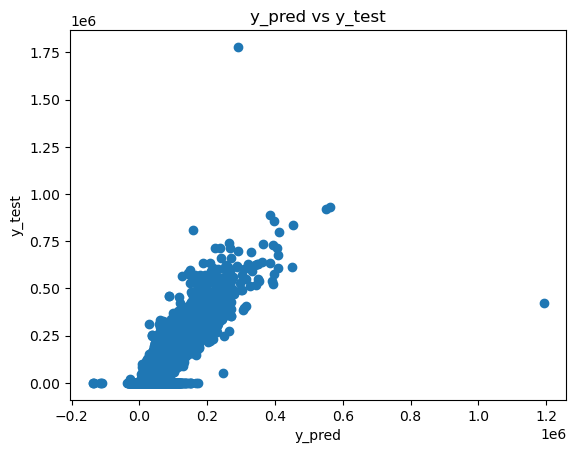

In [32]:
plt.scatter(y_pred, y_test)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("y_pred vs y_test")
plt.show()

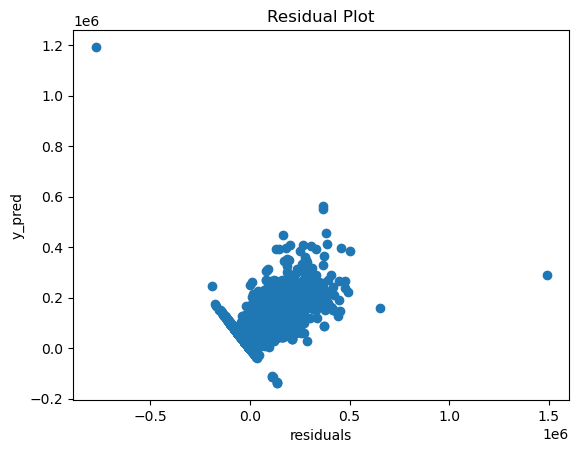

In [33]:
residual = y_test-y_pred
plt.scatter(residual, y_pred)
plt.xlabel("residuals")
plt.ylabel("y_pred")
plt.title("Residual Plot")
plt.show()

The model already shows a high R^2 Score of 0.62, but I wanted to try Lasso and Ridge regression to test if I could achieve a higher value

In [34]:
RidgeModel = Ridge()

RidgeModel.fit(X_train,y_train)

RidgeResult = RidgeModel.score(X_test,y_test)

print("R^2 Value for Linear Regression model:", LinRegResult)
print('\n'"R^2 Value for Ridge Regression model:", RidgeResult)

R^2 Value for Linear Regression model: 0.6177825171025988

R^2 Value for Ridge Regression model: 0.6165731156078207


In [35]:
LassoModel = Lasso()
LassoModel.fit(X_train,y_train)
LassoResult = LassoModel.score(X_test,y_test)

print("R^2 Value for Lasso Regression model(alpha = 1):", LassoResult)

R^2 Value for Lasso Regression model(alpha = 1): 0.6165575775074036


c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+12, tolerance: 8.058e+10
  model = cd_fast.enet_coordinate_descent(


In [36]:
LassoModel = Lasso(alpha = 0.1)
LassoModel.fit(X_train,y_train)
LassoResult = LassoModel.score(X_test,y_test)

print("R^2 Value for Lasso Regression model(alpha = 0.1):", LassoResult)

R^2 Value for Lasso Regression model(alpha = 0.1): 0.6165670047789116


c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.315e+14, tolerance: 8.058e+10
  model = cd_fast.enet_coordinate_descent(


In [37]:
LassoModel = Lasso(alpha = 0.01)
LassoModel.fit(X_train,y_train)
LassoResult = LassoModel.score(X_test,y_test)

print("R^2 Value for Linear Regression model:", LinRegResult)
print('\n'"R^2 Value for Ridge Regression model:", RidgeResult)
print('\n'"R^2 Value for Lasso Regression model(aplha = 0.01):", LassoResult)

R^2 Value for Linear Regression model: 0.6177825171025988

R^2 Value for Ridge Regression model: 0.6165731156078207

R^2 Value for Lasso Regression model(aplha = 0.01): 0.6165681482610911


c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.232e+14, tolerance: 8.058e+10
  model = cd_fast.enet_coordinate_descent(
